In [1]:
import pandas as pd
import numpy as np

#cleaning CSK File
csk=pd.read_excel("CSK.xlsx")
csk=csk.iloc[2:14]
csk.reset_index(inplace=True,drop=True)
columns={'By season':'Year','Unnamed: 1':'Total Match','Unnamed: 2':'CSK Win'}
csk=csk.iloc[:,0:3]
csk.rename(columns=columns,inplace=True)
csk.replace(to_replace='Suspended',value=np.NAN,inplace=True)
csk['CSK Win%']=csk['CSK Win']/csk['Total Match']
csk.set_index('Year',inplace=True,drop=True)
csk=csk['CSK Win%']*100
csk

Year
2008    56.250000
2009    53.333333
2010    56.250000
2011    68.750000
2012    52.631579
2013    66.666667
2014    62.500000
2015    58.823529
2016          NaN
2017          NaN
2018    68.750000
2019    58.823529
Name: CSK Win%, dtype: float64

In [2]:
#Cleaning MI File
mi=pd.read_excel("MI.xlsx")
mi=mi.iloc[342:354]
mi.reset_index(inplace=True,drop=True)
columns={'Open main menu':'Year','Unnamed: 1':'Total Match','Unnamed: 2':'MI Win'}
mi=mi.iloc[:,0:3]
mi.rename(columns=columns,inplace=True)
mi['MI Win%']=mi['MI Win']/mi['Total Match']
mi.set_index('Year',inplace=True,drop=True)
mi=mi['MI Win%']*100
mi.astype('float64')

Year
2008    50.000000
2009    35.714286
2010    68.750000
2011    62.500000
2012    58.823529
2013    68.421053
2014    46.666667
2015    62.500000
2016    50.000000
2017    70.588235
2018    42.857143
2019    68.750000
Name: MI Win%, dtype: float64

In [3]:
#cleaning KKR file
kkr=pd.read_excel("KKR.xlsx")
kkr=kkr.iloc[244:256]
kkr.reset_index(inplace=True,drop=True)
columns={'Open main menu':'Year','Unnamed: 1':'Total Match','Unnamed: 2':'KKR Win'}
kkr=kkr.iloc[:,0:3]
kkr.rename(columns=columns,inplace=True)
kkr['KKR Win%']=kkr['KKR Win']/kkr['Total Match']
kkr.set_index('Year',inplace=True,drop=True)
kkr=kkr['KKR Win%']*100
kkr.astype('float64')

Year
2008    42.857143
2009    21.428571
2010    50.000000
2011    53.333333
2012    66.666667
2013    37.500000
2014    68.750000
2015    50.000000
2016    53.333333
2017    56.250000
2018    56.250000
2019    42.857143
Name: KKR Win%, dtype: float64

In [4]:
#claning KXIP file
kxip=pd.read_excel("KXIP.xlsx")
kxip=kxip.iloc[287:299]
kxip.reset_index(inplace=True,drop=True)
columns={'Open main menu':'Year','Unnamed: 1':'Total Match','Unnamed: 2':'KXIP Win'}
kxip=kxip.iloc[:,0:3]
kxip.rename(columns=columns,inplace=True)
kxip['KXIP Win%']=kxip['KXIP Win']/kxip['Total Match']
kxip.set_index('Year',inplace=True,drop=True)
kxip=kxip['KXIP Win%']*100
kxip.astype('float64')

Year
2008    66.666667
2009    50.000000
2010    28.571429
2011    50.000000
2012    50.000000
2013    50.000000
2014    78.571429
2015    21.428571
2016    28.571429
2017    50.000000
2018    42.857143
2019    42.857143
Name: KXIP Win%, dtype: float64

In [5]:
#Cleaning DC File
dc=pd.read_excel("DC.xlsx")
dc=dc.iloc[311:323]
dc.reset_index(inplace=True,drop=True)
columns={'Open main menu':'Year','Unnamed: 1':'Total Match','Unnamed: 2':'DC Win'}
dc=dc.iloc[:,0:3]
change=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
for item in change:
    dc.replace(to_replace='IPL '+str(item),value=item,inplace=True)
dc.rename(columns=columns,inplace=True)
dc['DC Win%']=dc['DC Win']/dc['Total Match']
dc.set_index('Year',inplace=True,drop=True)
dc=dc['DC Win%']*100
dc

Year
2008    46.666667
2009    66.666667
2010    50.000000
2011    28.571429
2012    61.111111
2013    18.750000
2014    14.285714
2015    35.714286
2016    50.000000
2017    42.857143
2018    35.714286
2019    66.666667
Name: DC Win%, dtype: float64

In [6]:
#Merging all Dataframes
final=pd.merge(csk,mi,how='inner',left_index=True, right_index=True)
final=pd.merge(final,kxip,how='inner',left_index=True, right_index=True)
final=pd.merge(final,kkr,how='inner',left_index=True, right_index=True)
final=pd.merge(final,dc,how='inner',left_index=True, right_index=True)
final.replace(to_replace=np.NAN,value=0.0,inplace=True)
final

,CSK Win%,MI Win%,KXIP Win%,KKR Win%,DC Win%
Year,,,,,
2008,56.250000,50.000000,66.666667,42.857143,46.666667
2009,53.333333,35.714286,50.000000,21.428571,66.666667
2010,56.250000,68.750000,28.571429,50.000000,50.000000
2011,68.750000,62.500000,50.000000,53.333333,28.571429
2012,52.631579,58.823529,50.000000,66.666667,61.111111
2013,66.666667,68.421053,50.000000,37.500000,18.750000
2014,62.500000,46.666667,78.571429,68.750000,14.285714
2015,58.823529,62.500000,21.428571,50.000000,35.714286
2016,0.000000,50.000000,28.571429,53.333333,50.000000


<IPython.core.display.Javascript object>


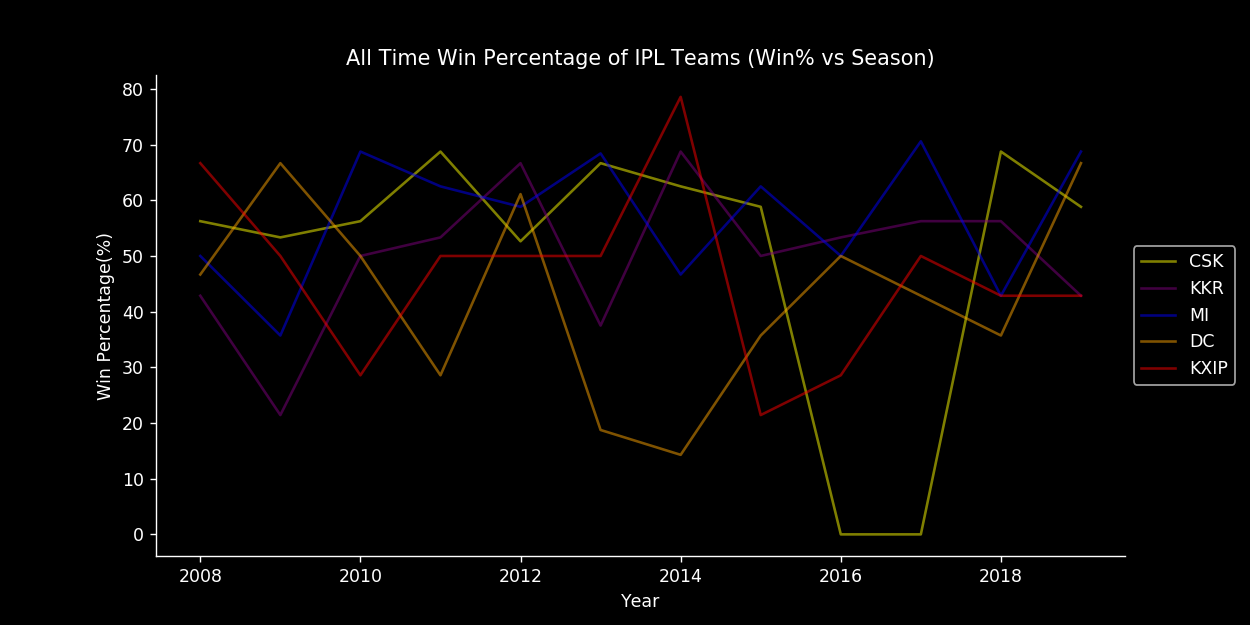

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
#plotting win percebtages
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.plot(final['CSK Win%'],c='yellow',alpha=0.5,label='CSK')
plt.plot(final['KKR Win%'],c='purple',alpha=0.5,label='KKR')
plt.plot(final['MI Win%'],c='blue',alpha=0.5,label='MI')
plt.plot(final['DC Win%'],c='orange',alpha=0.5,label='DC')
plt.plot(final['KXIP Win%'],c='red',alpha=0.5,label='KXIP')
plt.xlabel('Year')
plt.ylabel('Win Percentage(%)')
plt.title('All Time Win Percentage of IPL Teams (Win% vs Season)')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()